In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
import json
import pprint
import warnings
warnings.filterwarnings('ignore')

# Import API key
from api_keys import api_key

In [16]:
# read in csv
oscar_data= pd.read_csv("oscar_data.csv")
oscar_data.head()

,Year,Host,Most Nominations,Most Wins,Best Picture,Nominee 1,Nominee 2,Nominee 3,Nominee 4,Nominee 5,...,Best Costume Design (Black and White),Nominee 1.31,Nominee 2.31,Nominee 3.30,Nominee 4.30,Best Costume Design (Color),Nominee 1.32,Nominee 2.32,Nominee 3.31,Nominee 4.31
0,1927/28,Douglas Fairbanks,Seventh Heaven (5),Seventh Heaven AND Sunrise: A Song of Two Huma...,Wings,The Racket,Seventh Heaven,Unique and Artistic Production- Sunrise: A Son...,Chang: A Drama of the Wilderness,The Crowd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1928/29,William C. DeMille,In Old Arizona AND The Patriot (5),None (No Film Won More Than One Award),The Broadway Melody,Alibi,Hollywood Revue,In Old Arizona,The Patriot,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1929/30,Conrad Nagel,The Love Parade (6),All Quiet on the Western Front AND The Big Hou...,All Quiet on the Western Front,The Big House,Disraeli,The Divorcee,The Love Parade,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1930/31,Lawrence Grant,Cimarron (7),Cimarron (3),Cimarron,East Lynne,The Front Page,Skippy,Trader Horn,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1931/32,Conrad Nagel,Arrowsmith AND The Champ (4),Bad Girl AND The Champ (2),Grand Hotel,Arrowsmith,Bad Girl,The Champ,Five Star Final,One Hour with You,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
all_nominees = oscar_data[["Year", "Best Picture", "Nominee 1", "Nominee 2", "Nominee 3", "Nominee 4"]]

#Can we do all nominees in every category just for one year as well?

In [18]:
base_url = "https://api.themoviedb.org/3/"

#Enter year

year = "2018"

startdate = f"{year}-01-01"
enddate = f"{year}-12-31"

all_movies_response = requests.get(f'{base_url}/discover/movie?include_adult=false&include_video=false&primary_release_date.gte={startdate}&primary_release_date.lte={enddate}&with_original_language=en&sort_by=vote_count.desc&api_key={api_key}').json()
total_pages = json.dumps(all_movies_response["total_pages"], indent=4, sort_keys=True)

In [19]:
responseid = {'Title' : [],'ID' : [], 'Vote Average' : [], 'Release Date' : []}

#Request from API for each month
for i in range(1,int(total_pages)//10):

#EDIT DATES FOR DIFFERENT YEARS
    all_movies_response = requests.get(f'{base_url}/discover/movie?include_adult=false&include_video=false&primary_release_date.gte={startdate}&primary_release_date.lte={enddate}&with_original_language=en&sort_by=vote_count.desc&api_key={api_key}&page={i}').json()
    total_pages = json.dumps(all_movies_response["total_pages"], indent=4, sort_keys=True)

    #puts all results into a dictionary
    for j in range(len(all_movies_response["results"])):
        responseid['Title'].append(all_movies_response["results"][j]["title"])
        responseid['ID'].append(all_movies_response["results"][j]["id"])
        responseid['Vote Average'].append(all_movies_response["results"][j]["vote_average"])
        responseid['Release Date'].append(all_movies_response["results"][j]["release_date"])

In [20]:
#dictionary to dataframe, sorted and prepped for use

input_format = '%Y-%m-%d'
moviedata = pd.DataFrame(responseid)
# input string
moviedata['Release Date'] = pd.to_datetime(moviedata['Release Date'], utc=True)

moviedata['Release Date UNIX'] = moviedata['Release Date'].astype(np.int64)

moviedata = moviedata.sort_values("Release Date")
#moviedata['Release Date UNIX'] = (moviedata['Release Date'] - datetime(1970,1,1)).total_seconds()
moviedata['Day'] = moviedata['Release Date'].dt.day
moviedata['Month'] = moviedata['Release Date'].dt.month
moviedata['Year'] = moviedata['Release Date'].dt.year
moviedata = moviedata.reset_index(drop=True)

moviedata["Nominated"] = ""
moviedata

,Title,ID,Vote Average,Release Date,Release Date UNIX,Day,Month,Year,Nominated
0,House of Deadly Secrets,523443,4.700,2018-01-01 00:00:00+00:00,1514764800000000000,1,1,2018,
1,Grandpa's Great Escape,495737,5.900,2018-01-01 00:00:00+00:00,1514764800000000000,1,1,2018,
2,Bees Make Honey,476634,4.706,2018-01-01 00:00:00+00:00,1514764800000000000,1,1,2018,
3,Mad World,520788,5.300,2018-01-02 00:00:00+00:00,1514851200000000000,2,1,2018,
4,Hippopotamus,516027,5.648,2018-01-02 00:00:00+00:00,1514851200000000000,2,1,2018,
...,...,...,...,...,...,...,...,...,...
1375,Stan & Ollie,394741,6.974,2018-12-28 00:00:00+00:00,1545955200000000000,28,12,2018,
1376,"New Year, New You",567220,4.913,2018-12-28 00:00:00+00:00,1545955200000000000,28,12,2018,
1377,A Midnight Kiss,550036,5.897,2018-12-29 00:00:00+00:00,1546041600000000000,29,12,2018,
1378,The Wrong Patient,571768,6.800,2018-12-30 00:00:00+00:00,1546128000000000000,30,12,2018,


In [21]:
titles = moviedata['Title'].to_list()
noms = []


for movie in titles:
    mask = oscar_data[oscar_data.apply(lambda row: row.astype(str).str.contains(str(movie), case=False).any(), axis=1)]
    if mask.empty:
        noms.append("No")
        
    else:
        if mask['Year'].values[0] == year:
            noms.append("Yes")
        else:
            noms.append("No")

moviedata['Nominated'] = noms

2018


In [22]:
nominatedmovies = moviedata.loc[moviedata['Nominated'] == "Yes"]

,Title,ID,Vote Average,Release Date,Release Date UNIX,Day,Month,Year,Nominated
47,"Hale County This Morning, This Evening",490785,5.893,2018-01-19 00:00:00+00:00,1516320000000000000,19,1,2018,Yes
62,End Game,510258,7.106,2018-01-21 00:00:00+00:00,1516492800000000000,21,1,2018,Yes
136,Black Panther,284054,7.400,2018-02-13 00:00:00+00:00,1518480000000000000,13,2,2018,Yes
281,Isle of Dogs,399174,7.848,2018-03-23 00:00:00+00:00,1521763200000000000,23,3,2018,Yes
289,Ready Player One,333339,7.603,2018-03-28 00:00:00+00:00,1522195200000000000,28,3,2018,Yes
319,A Quiet Place,447332,7.396,2018-04-03 00:00:00+00:00,1522713600000000000,3,4,2018,Yes
409,Avengers: Infinity War,299536,8.200,2018-04-25 00:00:00+00:00,1524614400000000000,25,4,2018,Yes
436,Black Sheep,543803,7.224,2018-05-01 00:00:00+00:00,1525132800000000000,1,5,2018,Yes
447,RBG,493099,7.477,2018-05-04 00:00:00+00:00,1525392000000000000,4,5,2018,Yes
487,Solo: A Star Wars Story,348350,6.560,2018-05-15 00:00:00+00:00,1526342400000000000,15,5,2018,Yes


In [ ]:
season = []

for row in nominatedmovies['Month']:
    if row in ("Nov", "Dec"):
        season.append("Yes")
    else:
        season.append("No")

nominatedmovies['Oscar Season'] = season

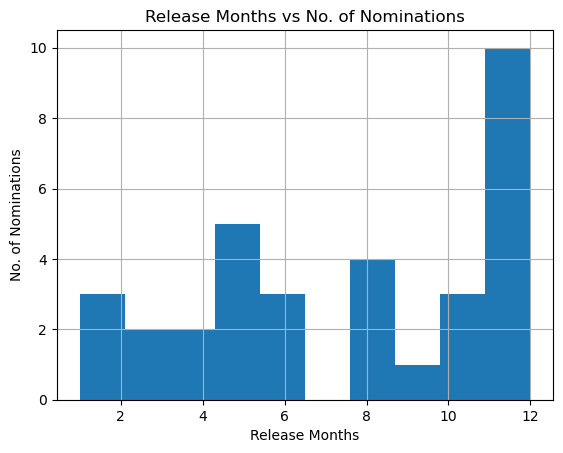

In [23]:
# Histogram - Release Month vs Nominations
nominatedmovies.hist(column='Month')
plt.title('Release Months vs No. of Nominations')
plt.xlabel('Release Months')
plt.ylabel('No. of Nominations')

# Display the histogram
plt.show()

In [ ]:
#Basic Bar Chart below

labels = moviedata["Month"].unique()
y_axis = nominatedmovies["Month"].value_counts()
histodf = pd.DataFrame({'# of Oscar Nominated Movies released in month': y_axis}, index=labels)
ax = histodf['# of Oscar Nominated Movies released in month'].plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("# of Oscar Nominated Movies released in month")
plt.show()

In [ ]:
#Line plot – two lines, year against no. of nominations, line 1 for October – December, line 2 for January – September


In [ ]:
#Multi-Box plot of a sample of movie review scores through the year, each plot for a different year. Oscar nominees will be added on in a different colour


In [ ]:
def linregplot(i,x,y,j,k):
    lr_slope, lr_int, lr_r, lr_p, lr_std_err = linregress(i[x],i[y])
    lr_fit = lr_slope * i[x] + lr_int
    title = str(f"{j} vs. {k}")
    plt.scatter(i[x],i[y], alpha= 0.8, edgecolors= 'black')
    plt.plot(i[x],lr_fit, 'r', label = 'y = {:.2f} + {:.2f}*x'.format(lr_slope, lr_int))
    plt.legend(loc = 'best')
    plt.xticks(rotation=0)
    plt.xlabel(j)
    plt.ylabel(k)
    plt.title(title)

    print(f"The r-value is: {lr_r}")
    plt.show()

In [ ]:
#Scatter Plot with Linreg

linregplot(moviedata, 'Release Date UNIX', 'Vote Average', 'Release Date (UNIX)', 'Average Review Score')

In [ ]:
#Month Pie Chart

data_grouped_month = nominatedmovies.groupby(["Month"])
labels_month = nominatedmovies["Month"].unique()
bymonth = data_grouped_month["Month"].value_counts()
df_bymonth = pd.DataFrame({'Month': bymonth}, index=labels_month)
plot_bymonth = df_bymonth['Month'].plot(kind="pie", autopct='%.1f%%')

In [ ]:
#Oscar Season Pie Chart

print("Oscar Season is defined as November/December, 16.6% of the year")

data_grouped_month = nominatedmovies.groupby(["Oscar Season"])
labels_month = nominatedmovies["Oscar Season"].unique()
bymonth = data_grouped_month["Oscar Season"].value_counts()
df_bymonth = pd.DataFrame({'Oscar Season': bymonth}, index=labels_month)
plot_bymonth = df_bymonth['Oscar Season'].plot(kind="pie", autopct='%.1f%%')